1/1 [==============================] - 0s 43ms/step


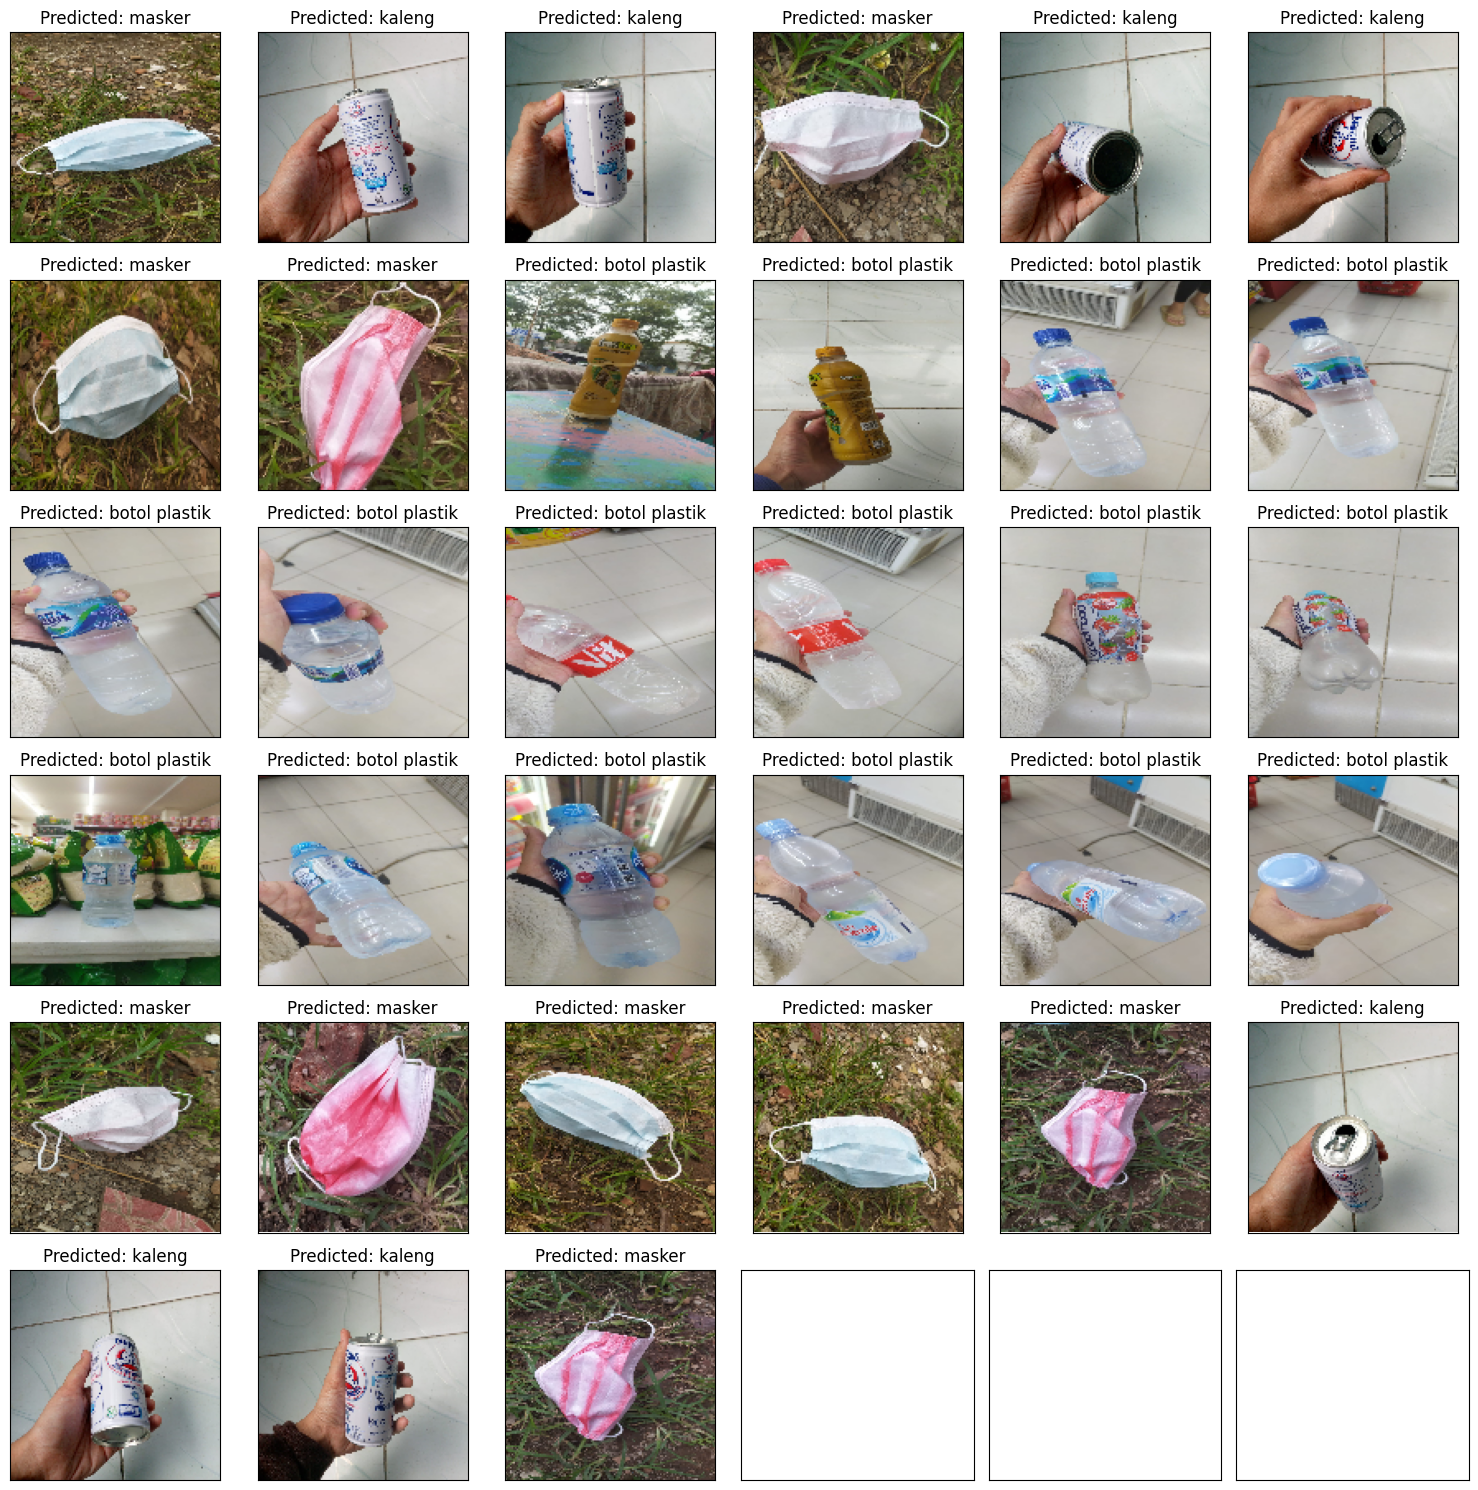

In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('waste-cnn.h5')

# Path to the test image folder
test_folder = './test'

# Get the list of image file names in the test folder
image_files = [file for file in os.listdir(test_folder) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Define the class labels used in training
labels = ['botol plastik', 'kaleng', 'masker']

num_images = len(image_files)
num_rows = math.ceil(math.sqrt(num_images))
num_cols = math.ceil(num_images / num_rows)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Check if all images have been displayed
    if i >= num_images:
        break
    
    # Load and display the image
    img_path = os.path.join(test_folder, image_files[i])
    img = image.load_img(img_path, target_size=(128, 128))
    ax.imshow(img)
    
    # Preprocess the image
    img = image.img_to_array(img)
    img = img / 255.0
    img = img.reshape(1, 128, 128, 3)
    
    # Perform prediction
    prediction = model.predict(img)
    predicted_class = labels[np.argmax(prediction)]
    
    # Get the true label from the file name
    true_label = image_files[i].split('.')[0]
    
    ax.set_title(f"Predicted: {predicted_class}", color="black")

plt.tight_layout()
plt.show()